In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# Reading dataset

In [3]:
df=pd.read_csv("Maternal Health Risk.csv")

In [4]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
df.shape

(1014, 7)

In [6]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [7]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [9]:
# Visualising class unique counts

[Text(0, 0, '272 (27%)'), Text(0, 0, '336 (33%)'), Text(0, 0, '406 (40%)')]

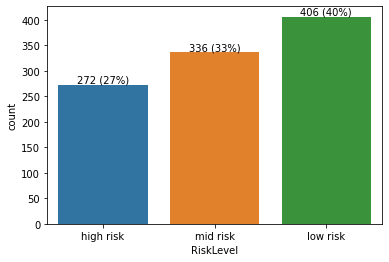

In [10]:
ax = sns.countplot(x=df.RiskLevel,
                   order=df.RiskLevel.value_counts(ascending=True).index);
        
abs_values = df['RiskLevel'].value_counts(ascending=True)
rel_values = df['RiskLevel'].value_counts(ascending=True, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

In [11]:
# Checking multicollinearity between features

<AxesSubplot:>

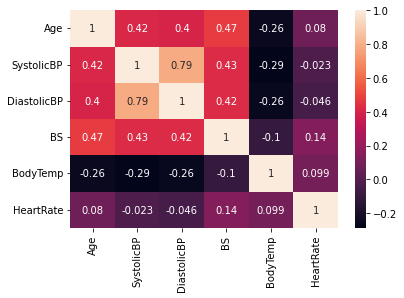

In [12]:
sns.heatmap(df.corr(), annot=True)

In [42]:
# SystolicBP and DiastolicBP seems more corealted which have positive corelation of 0.79, whic is almost tolerable 

In [14]:
# bucketing of Age variables

In [15]:
bins=np.arange(10,71,5)
bins

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

In [16]:
df['Age']=pd.cut(df.Age,bins=bins)
df['Age']

0       (20, 25]
1       (30, 35]
2       (25, 30]
3       (25, 30]
4       (30, 35]
          ...   
1009    (20, 25]
1010    (50, 55]
1011    (30, 35]
1012    (40, 45]
1013    (30, 35]
Name: Age, Length: 1014, dtype: category
Categories (12, interval[int64, right]): [(10, 15] < (15, 20] < (20, 25] < (25, 30] ... (50, 55] < (55, 60] < (60, 65] < (65, 70]]

In [17]:
# Using label encoder for categorial data(ordering into neumerical form)

In [18]:
label_encoder=LabelEncoder()
label_encoder2=LabelEncoder()

In [19]:
df['AgeBucket_n']=label_encoder.fit_transform(df.Age)
df['RiskLevel_n']=label_encoder2.fit_transform(df.RiskLevel)

In [20]:
# Mapping values assigned to label encoder

In [21]:
le_Age_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(le_Age_mapping)

{Interval(10.0, 15.0, closed='right'): 0, Interval(15.0, 20.0, closed='right'): 1, Interval(20.0, 25.0, closed='right'): 2, Interval(25.0, 30.0, closed='right'): 3, Interval(30.0, 35.0, closed='right'): 4, Interval(35.0, 40.0, closed='right'): 5, Interval(40.0, 45.0, closed='right'): 6, Interval(45.0, 50.0, closed='right'): 7, Interval(50.0, 55.0, closed='right'): 8, Interval(55.0, 60.0, closed='right'): 9, Interval(60.0, 65.0, closed='right'): 10, Interval(65.0, 70.0, closed='right'): 11, nan: 12}


In [22]:
le_RiskLevel_mapping = dict(zip(label_encoder2.classes_, label_encoder2.transform(label_encoder2.classes_)))
print(le_RiskLevel_mapping)

{'high risk': 0, 'low risk': 1, 'mid risk': 2}


In [23]:
df=df.drop(['Age','RiskLevel'],axis=1)
df.head()

,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,AgeBucket_n,RiskLevel_n
0,130,80,15.0,98.0,86,2,0
1,140,90,13.0,98.0,70,4,0
2,90,70,8.0,100.0,80,3,0
3,140,85,7.0,98.0,70,3,0
4,120,60,6.1,98.0,76,4,1


In [24]:
X=df.drop('RiskLevel_n',axis=1)
data=X.values

In [25]:
y=df.RiskLevel_n
labels=y.values

In [26]:
# train test split 

In [27]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=30)

In [28]:
# setting hyperparameter tunning for GridSearchCV and finding out best model

In [29]:
model_params={
       'GaussianNB':{
        'model':GaussianNB(),
        'param':{'var_smoothing': np.logspace(0,-9, num=100)
        
        }
    },
    'RandomForest':{
        'model':RandomForestClassifier(),
        'param':{'n_estimators':[1,5,10]
            
        }
    },
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini', 'entropy'],
            'splitter':['best','random'],
            'max_depth': range(1,10)
        }
        
    },
    'SVM':{
        'model':SVC(gamma='auto'),
        'param':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
            
        }
    },
    'XGBoosT':{
        'model':xgb.XGBClassifier(),
        'param':{
              'max_depth': [3, 6, 10, 15],
    
              'n_estimators': [100, 250, 500, 750],
        }
    },
    'BaggingClassifier':{
        'model':BaggingClassifier(),
        'param':{
              'n_estimators' : [100, 300, 500, 800, 1200]
              
            
        }
    }
   } 

In [30]:
scores=[]
for model_name,mp in model_params.items():
    mod_grid=GridSearchCV(mp['model'],mp['param'],cv=10,return_train_score=False)
    mod_grid.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':mod_grid.best_score_,
        'best_param':mod_grid.best_params_
    })

In [31]:
df=pd.DataFrame(scores,columns=['model','best_score','best_param'])
df

,model,best_score,best_param
0,GaussianNB,0.612812,{'var_smoothing': 0.0012328467394420659}
1,RandomForest,0.837293,{'n_estimators': 10}
2,DecisionTreeClassifier,0.738663,"{'criterion': 'entropy', 'max_depth': 9, 'spli..."
3,SVM,0.764544,"{'C': 20, 'kernel': 'rbf'}"
4,XGBoosT,0.850828,"{'max_depth': 3, 'n_estimators': 750}"
5,BaggingClassifier,0.838482,{'n_estimators': 1200}


In [32]:
# Creating model and evaluating its performance metrics

In [33]:
model=xgb.XGBClassifier(max_depth=3,n_estimators=750)

In [34]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=750,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [35]:
y_predicted=model.predict(X_test)
y_predicted

array([1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 2, 1, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1,
       1, 2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 0,
       2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1,
       0, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2,
       1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1,
       2, 0, 2, 1, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0,
       1, 1, 2, 2, 2], dtype=int64)

In [36]:
# Mannually predicting from the model

In [37]:
model.predict([[130,80,10,98,90,0]])

array([0], dtype=int64)

In [38]:
model.predict([[130,80,10,98,90,1]])

array([2], dtype=int64)

In [39]:
# Here from above when all input features like BP, heart rate, temperature being same
# Only difference in age group where Age group of patient(10-15] our model predicts Pregnancy of being high risk
# Where for Age group of patients (15-20], model predicts as mid level risk in pregnancy.

<AxesSubplot:title={'center':'Confusion Matrix_Heatmap'}>

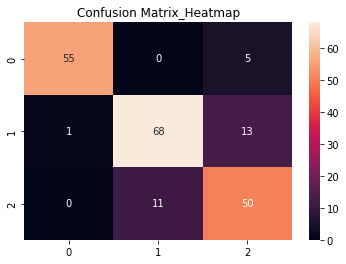

In [40]:
cm=confusion_matrix(y_test,y_predicted)
plt.title('Confusion Matrix_Heatmap')
sns.heatmap(cm,annot=True)

In [41]:
print("Classification Report")
print(classification_report(y_test,y_predicted))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.86      0.83      0.84        82
           2       0.74      0.82      0.78        61

    accuracy                           0.85       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.85      0.85       203



In [43]:
#Pickling the model file for the deployment

In [44]:
import pickle

In [45]:
pickle.dump(model,open('maternalrisk_model.pkl','wb'))